<a href="https://colab.research.google.com/github/anafer25/Eigenvalue-Distributions-of-Random-Matrices/blob/main/Eigenvalue_Distributions_of_Random_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

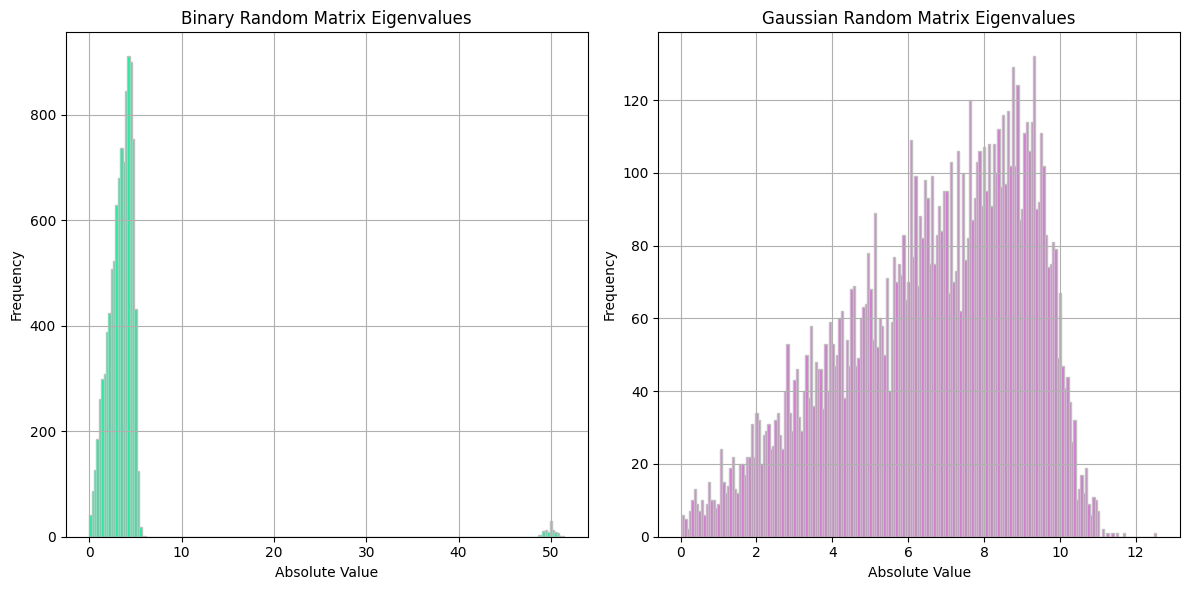

In [1]:
import numpy as np
import matplotlib.pyplot as plt


class RandomMatrixEigenvalues:
    """
    Class to generate random matrices (binary or Gaussian),
    compute their eigenvalues, and store the results.
    """

    def __init__(self, matrix_size: int = 100, trials: int = 100):
        self.matrix_size = matrix_size
        self.trials = trials
        self.binary_eigenvalues: np.ndarray = np.array([])
        self.gaussian_eigenvalues: np.ndarray = np.array([])

    def generate_eigenvalues(self) -> None:
        """
        Generate eigenvalues for binary and Gaussian random matrices
        over the specified number of trials.
        """
        binary_vals = []
        gaussian_vals = []

        for _ in range(self.trials):
            # binary random matrix (0s and 1s)
            binary_matrix = np.random.randint(0, 2, size=(self.matrix_size, self.matrix_size))
            binary_vals.extend(np.abs(np.linalg.eig(binary_matrix)[0]))

            # gaussian random matrix (mean 0, variance 1)
            gaussian_matrix = np.random.randn(self.matrix_size, self.matrix_size)
            gaussian_vals.extend(np.abs(np.linalg.eig(gaussian_matrix)[0]))

        self.binary_eigenvalues = np.array(binary_vals)
        self.gaussian_eigenvalues = np.array(gaussian_vals)


class EigenvaluePlotter:
    """
    Class to create histogram plots of eigenvalues.
    """

    @staticmethod
    def plot_histograms(binary_vals: np.ndarray, gaussian_vals: np.ndarray,
                        bins: int = 200, colors: tuple = ('mediumspringgreen', 'orchid')) -> None:
        """
        Plot side-by-side histograms of eigenvalues.

        Args:
            binary_vals: Eigenvalues from binary random matrices
            gaussian_vals: Eigenvalues from Gaussian random matrices
            bins: Number of bins in histogram
            colors: Tuple with colors for binary and Gaussian plots
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        ax1.hist(binary_vals, bins=bins, color=colors[0], edgecolor='silver')
        ax1.set_title('Binary Random Matrix Eigenvalues')
        ax1.set_xlabel('Absolute Value')
        ax1.set_ylabel('Frequency')
        ax1.grid(True)

        ax2.hist(gaussian_vals, bins=bins, color=colors[1], edgecolor='silver')
        ax2.set_title('Gaussian Random Matrix Eigenvalues')
        ax2.set_xlabel('Absolute Value')
        ax2.set_ylabel('Frequency')
        ax2.grid(True)

        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    # parameters
    MATRIX_SIZE = 100
    TRIALS = 100
    NUM_BINS = 200

    # generate eigenvalues
    matrix_sim = RandomMatrixEigenvalues(matrix_size=MATRIX_SIZE, trials=TRIALS)
    matrix_sim.generate_eigenvalues()

    # plot histograms
    EigenvaluePlotter.plot_histograms(matrix_sim.binary_eigenvalues,
                                      matrix_sim.gaussian_eigenvalues,
                                      bins=NUM_BINS)
